<center><h1>Gradient descent principles</h1>
<h2><i>Practical 2</i></h2></center>

*   **Manuel Andrés Hernández Alonso**, `mhernaal70.alumnes@ub.edu`, **niub**20274855
*   **Alexandru Oarga Hategan**, `aoargaha35@alumnes.ub.edu`, **niub**21447381

# 1.1 A simple quadratic function

Given the following function:

$$
f(\mathbf{x}) = x_1^2 + x_2^2
$$

with $\mathbf{x} \in \mathbb{R}^2$, $\mathbf{x} = (x_1, x_2)$.

**1. Please, implement the previous algorithm with a constant $\alpha^k=0.1$ parameter, performing at most 100 iterations and using different initial values $\mathbf{x^0}$**.

In the following cell we implement the gradient descent algorithm given, where we perform:

$$
\textbf{x}_{k+1} = \textbf{x}_{k} - \alpha^k \nabla f(\textbf{x}_{k})
$$

In [1]:
import numpy as np

def gradient_descent(x_0, grad_fn, a_k=0.1, iterations=100, tol=0.001, dpath=False):
  if dpath:
    path = []
  x = np.array(x_0)
  for k in range(iterations):
    grad = grad_fn(*x)
    if dpath:
      path.append(x)
    x = x - a_k * grad
  if dpath:
    return x, np.array(path)
  return x

def grad_f1(x1, x2):
  return np.array([2*x1+x2, x1+2*x2])


Given the implementation of the algorithm, we plot both the countour and 3d profile of $f(\mathbf{x})$, and we show in red the steps taken until the minimum is reached. We used a total of 9 different values for $\mathbf{x^0}$.

In [2]:
import random
import matplotlib.pyplot as plt

def countour_plot(fig, ax, function, title="", xmin=-5.0, xmax=5.0, ymin=-5.0, ymax=5.0, steps=100):
  xlist = np.linspace(xmin, xmax, steps)

  ylist = np.linspace(ymin, ymax, steps)
  X, Y = np.meshgrid(xlist, ylist)
  Z = function(X, Y)
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title(title)
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')

[ 8.03087704e-05 -8.03087704e-05]
[-5.92732547e-05  5.92732547e-05]
[-4.88461334e-05  4.88461334e-05]
[ 1.19144298e-05 -1.19144298e-05]
[-7.47406021e-05  7.47406021e-05]
[ 7.0321705e-05 -7.0321705e-05]
[-1.54187592e-05  1.54187592e-05]
[-2.55378853e-05  2.55378853e-05]
[ 2.16541691e-05 -2.16541691e-05]


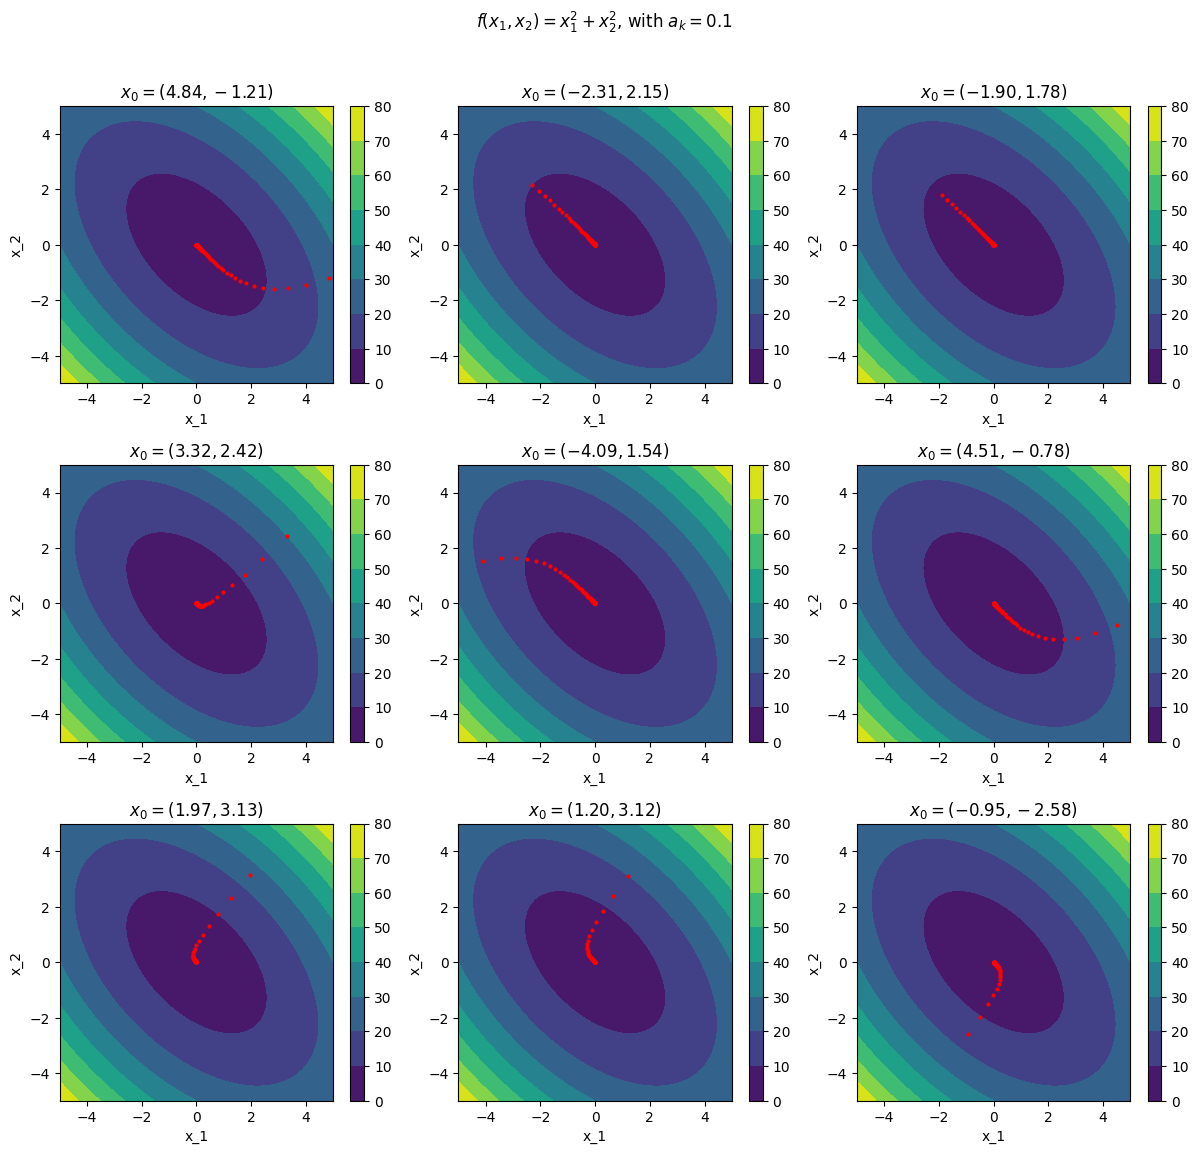

In [4]:
def fA(x1, x2):
  return x1**2+x1*x2+x2**2+5

#fig,ax=plt.subplots(1,1) # uncomment for 1-row plot
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1 = (0.5-random.random())*10.0
  x2 = (0.5-random.random())*10.0
  x_star, path = gradient_descent([x1, x2], grad_f1,dpath=True)
  countour_plot(fig, ax[i//3, i%3], fA, title=f"$x_0=({x1:.2f}, {x2:.2f})$")
  ax[i//3, i%3].plot(path[:,0],path[:,1], marker='.', ls='none', ms=4, color="red")
  paths.append(path)
  print(x_star)
fig.suptitle("$f(x_1,x_2)=x_1^2+x_2^2$, with $a_k=0.1$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
x1min, x1max = -4, 4
x2min, x2max = -4, 4

filtered_paths = []
for path in paths:
  new_path = []
  for x in path:
    if (x1min < x[0] < x1max) and (x2min < x[1] < x2max):
      new_path.append([x[0], x[1], fA(x[0], x[1])])
  filtered_paths.append(new_path)

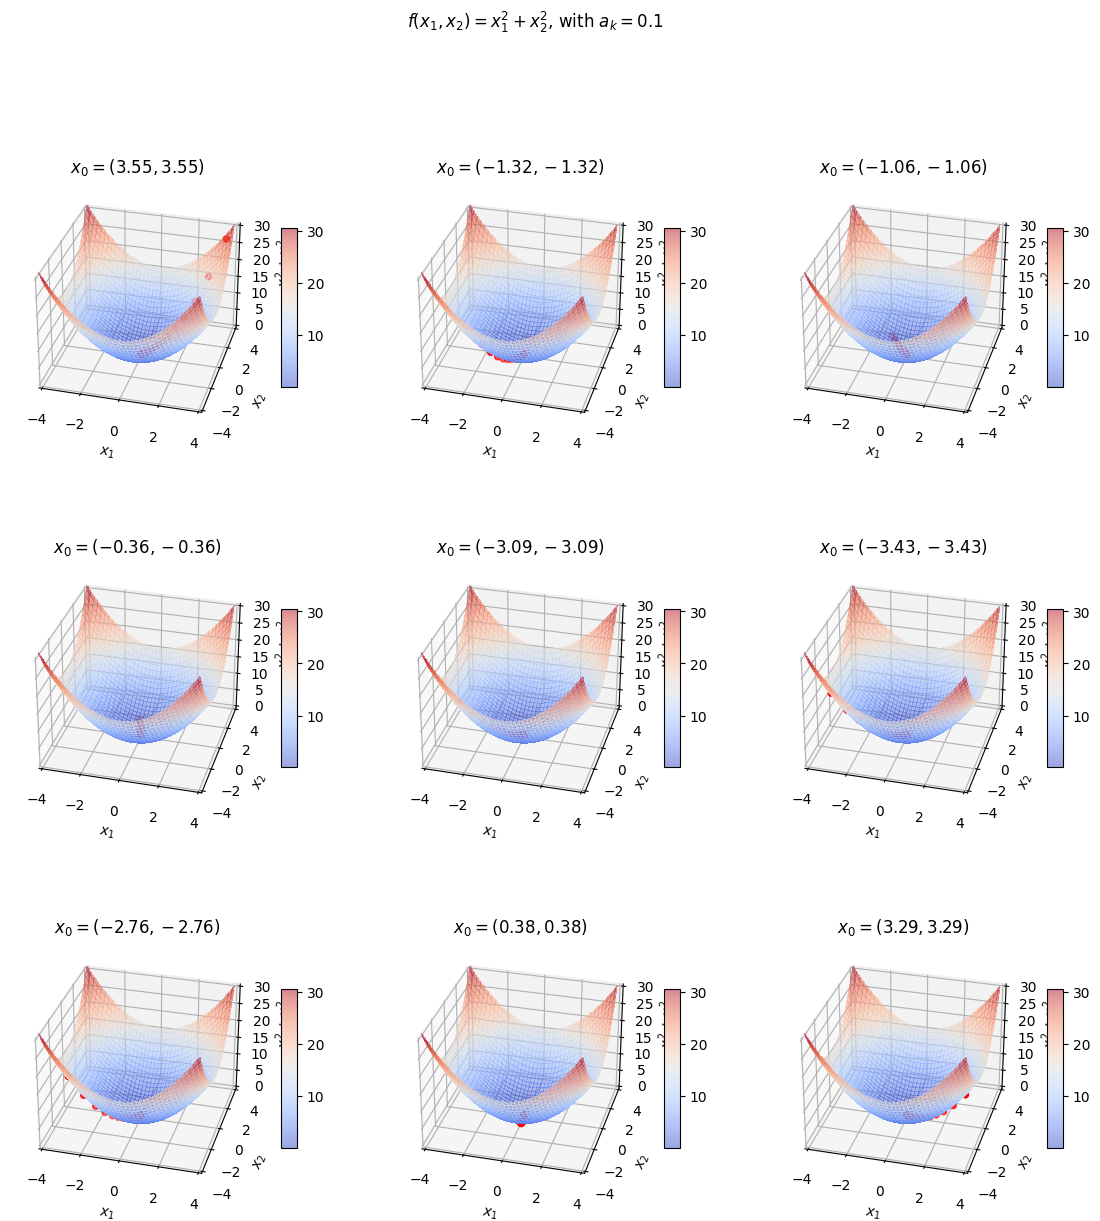

In [ ]:
from matplotlib import cm

def plot_paths_3d(paths, xrange, yrange, xmin=-2, xmax=2, ymin=-2, ymax=2):
  fig = plt.figure(figsize=(14, 14))
  for i in range(xrange):
    for j in range(yrange):
      idx = (i*xrange)+j
      ax = fig.add_subplot(3, 3, idx + 1, projection='3d')
      path = paths[idx]

      # Make data.
      X = np.arange(xmin, xmax, 0.1)
      Y = np.arange(ymin, ymax, 0.1)
      X, Y = np.meshgrid(X, Y)
      Z = (X**2) + (Y**2)

      # Plot the surface.
      surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                            linewidth=0.1, antialiased=False, alpha=0.5)

      # Customize the z axis.
      ax.set_xlim(xmin, xmax)
      ax.set_ylim(ymin, ymax)
      ax.set_zlim(0, 30)
      ax.set_xlabel('$x_1$')
      ax.set_ylabel('$x_2$')
      ax.set_zlabel('$x_1^2 + x_2^2$')
      ax.view_init(30, -75) # rotate view

      x1 = path[0][0]
      x2 = path[0][0]
      ax.set_title(f"$x_0=({x1:.2f}, {x2:.2f})$")

      # Add a color bar which maps values to colors.
      fig.colorbar(surf, shrink=0.5, aspect=10)

      #ax.quiver(0, 0, 0, 1, 1, 1, color='b', arrow_length_ratio=0.1)
      ax.scatter(np.array(filtered_paths[idx])[:,0], np.array(filtered_paths[idx])[:,1], np.array(filtered_paths[idx])[:,2], c='red')

  fig.suptitle("$f(x_1,x_2)=x_1^2+x_2^2$, with $a_k=0.1$")
  plt.show()

plot_paths_3d(filtered_paths, 3, 3, xmin=-4, xmax=4, ymin=-4, ymax=4)

In the previous figures, one can notice that, the step taken in the gradient descent is larger when the slope of the function is larger. This is a direct consequence of using the gradient $\nabla f(\textbf{x}_{k})$ as the descent direction. In this case, the function has only one minima and the descent is able to reach it.

**2. You may try other values of $\alpha^k$ such as $\alpha^k=1$ and $\alpha^k=2$**.

With the following code we run the descent and plot the resulting trajectories:

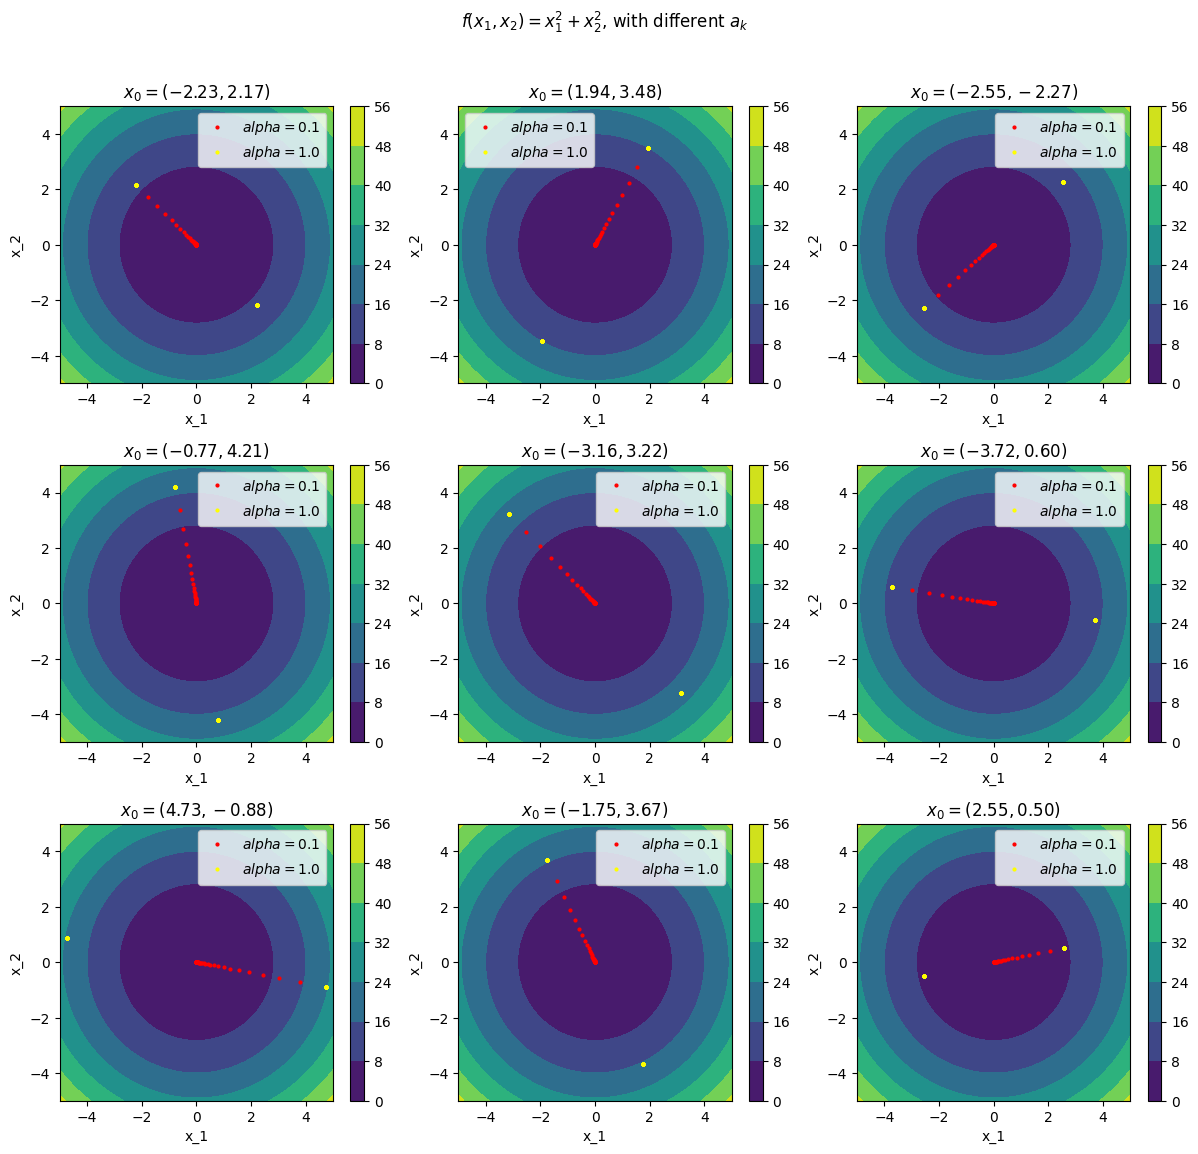

In [ ]:
def fA(x1, x2):
  return x1**2+x2**2

def filter_path(path, x1min=-2, x1max=2, x2min=-2, x2max=2):
  new_path = []
  for x in path:
    if (x1min < x[0] < x1max) and (x2min < x[1] < x2max):
      new_path.append([x[0], x[1]])
  return np.array(new_path)

#fig,ax=plt.subplots(1,1) # uncomment for 1-row plot
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1 = (0.5-random.random())*10.0
  x2 = (0.5-random.random())*10.0
  x_star, path_01 = gradient_descent([x1, x2], grad_f1,dpath=True, a_k=0.1)
  x_star, path_1 = gradient_descent([x1, x2], grad_f1,dpath=True, a_k=1.0)
  x_star, path_2 = gradient_descent([x1, x2], grad_f1,dpath=True, a_k=2.0)
  countour_plot(fig, ax[i//3, i%3], fA, title=f"$x_0=({x1:.2f}, {x2:.2f})$", xmin=-5, xmax=5, ymin=-5, ymax=5)
  ax[i//3, i%3].plot(path_01[:,0],path_01[:,1], marker='.', ls='none', ms=4, color="red", label='$alpha=0.1$')
  ax[i//3, i%3].plot(path_1[:,0],path_1[:,1], marker='.', ls='none', ms=4, color="yellow", label='$alpha=1.0$')
  ax[i//3, i%3].legend()
  paths.append(path)
fig.suptitle("$f(x_1,x_2)=x_1^2+x_2^2$, with different $a_k$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In the above figures, we can see the difference beetwen the descent obtained using values of $\alpha_k = 0.1$ and $\alpha_k = 1.0$. We saw before that the descent with a value of $\alpha_k = 0.1$ was able to reach the minimum. In this case, we can see that, with a value of $\alpha_k = 1.0$, the gradient descent is stuck exclusively beetwen 2 points, the initial point and the inverse point. As a consequence, with this values of $\alpha_k$ the descent is not able to converge but instead it periodically iterates over two values. In the next figures we plot the case of $\alpha_k = 2.0$:

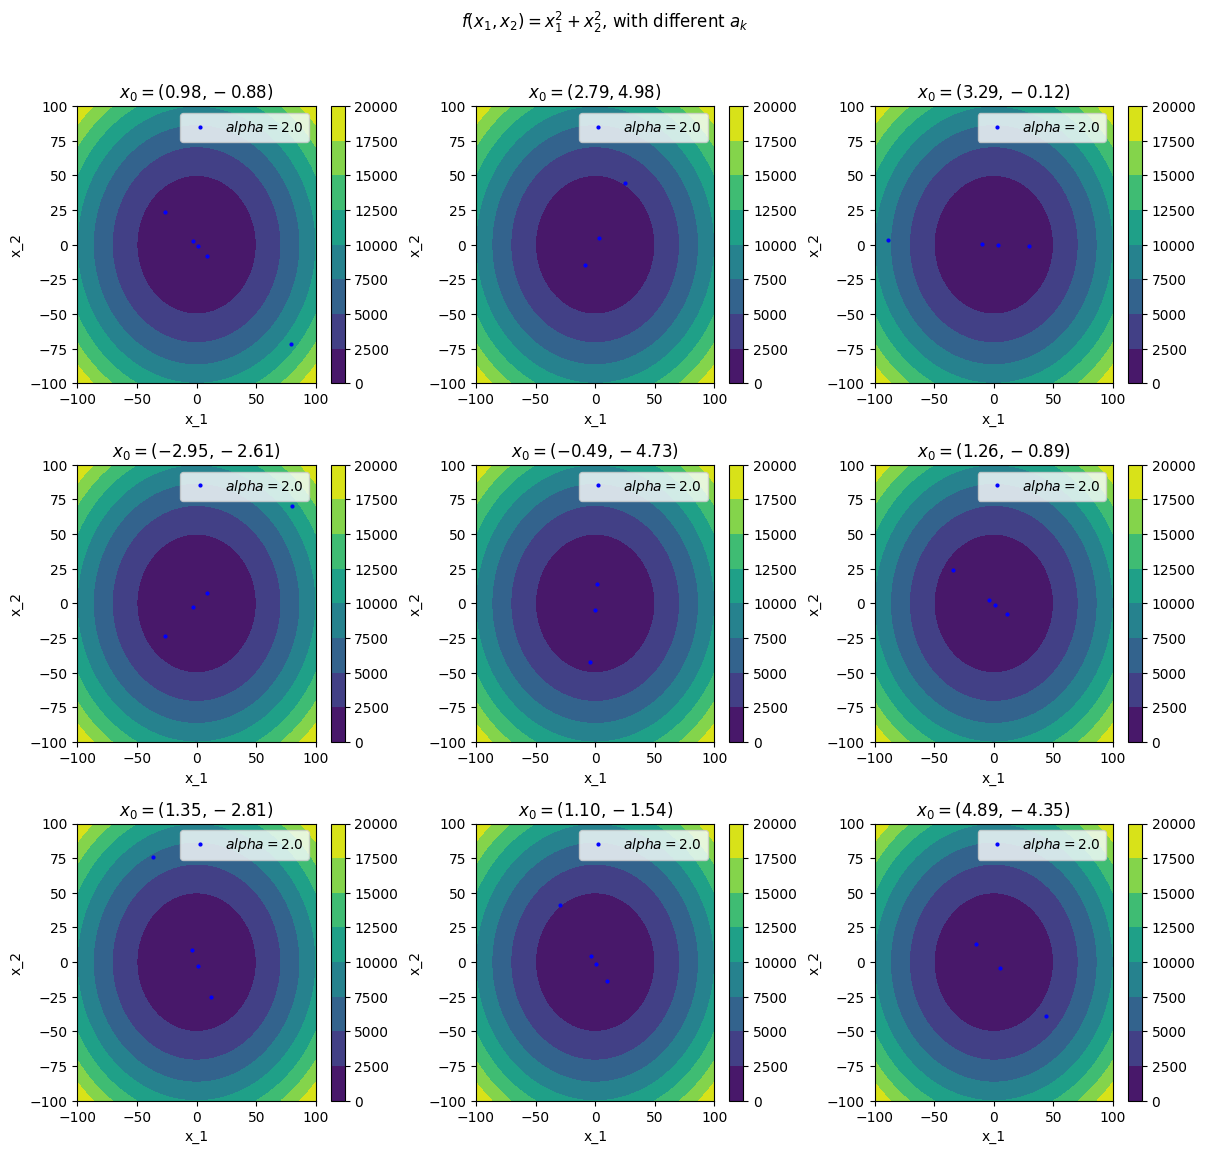

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
for i in range(9):
  x1 = (0.5-random.random())*10.0
  x2 = (0.5-random.random())*10.0
  x_star, path_2 = gradient_descent([x1, x2], grad_f1,dpath=True, a_k=2.0)
  countour_plot(fig, ax[i//3, i%3], fA, title=f"$x_0=({x1:.2f}, {x2:.2f})$", xmin=-100, xmax=100, ymin=-100, ymax=100)
  path_2 = filter_path(path_2, x1min=-100, x1max=100, x2min=-100, x2max=100)
  ax[i//3, i%3].plot(path_2[:,0],path_2[:,1], marker='.', ls='none', ms=4, color="blue", label='$alpha=2.0$')
  ax[i//3, i%3].legend()
fig.suptitle("$f(x_1,x_2)=x_1^2+x_2^2$, with different $a_k$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In this figures, we can see that, with a values of $\alpha_k > 1.0$, in particular, with a value of $\alpha_k = 2.0$, the gradient descent method, does not reach the minimum, but instead it overshoots the minimum point and, after a series of steps, it is moved further away from the minimum point with each iteration. This happens because the gradient of this function increases with the distance from the minimum point. Since the step is too large, the next point $\textbf{x}_{k+1}$, computed at iteration $k$ will have $f(\textbf{x}_{k+1}) > f(\textbf{x}_{k})$ and $\nabla f(\textbf{x}_{k+1}) > \nabla f(\textbf{x}_{k})$. As a consequence, each iteration of the gradient descent will overshoot the minimum and reach a point further and further away from the minimum. Hence, the method will not be able to converge. Notice the difference in scale in the above figures compared with the ones where $\alpha_k = 0.1$ and $\alpha_k = 1.0$.

# 1.2 A function with multiple minima

Given the following function:

$$
f(\mathbf{x_1, x_2}) = x_1^2(4-2.1x_1^2+\frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4+4x_2^2)
$$


In [ ]:
def f_2(x1, x2):
  return (x1**2)*(4-2.1*x1**2+(1/3)*(x1**4))+x1*x2+(x2**2)*(-4+4*(x2**2))

def grad_f2(x1, x2):
  return np.array([8*x1-8.4*(x1**3)+2*(x1**5)+x2, x1-8*x2+16*(x2**3)])

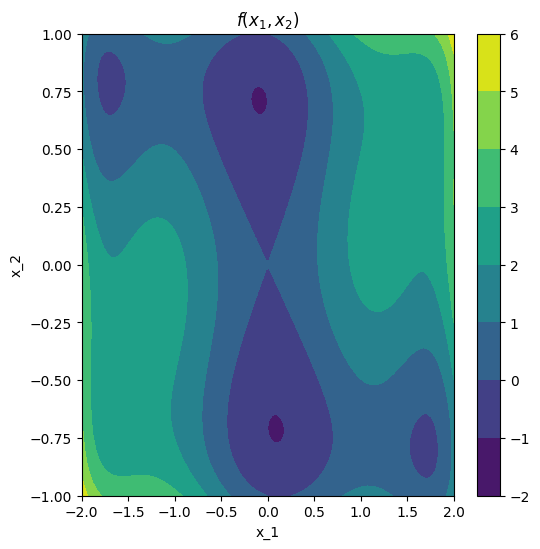

In [ ]:
plt.rcParams['figure.figsize'] = [6, 6]
fig, ax = plt.subplots(1)
countour_plot(fig, ax, f_2, title="$f(x_1, x_2)$", xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=1.0)

**1. We will try the simple gradient descent with 100 iterations with $\alpha^k=0.1$ and different values of $x^0$**.

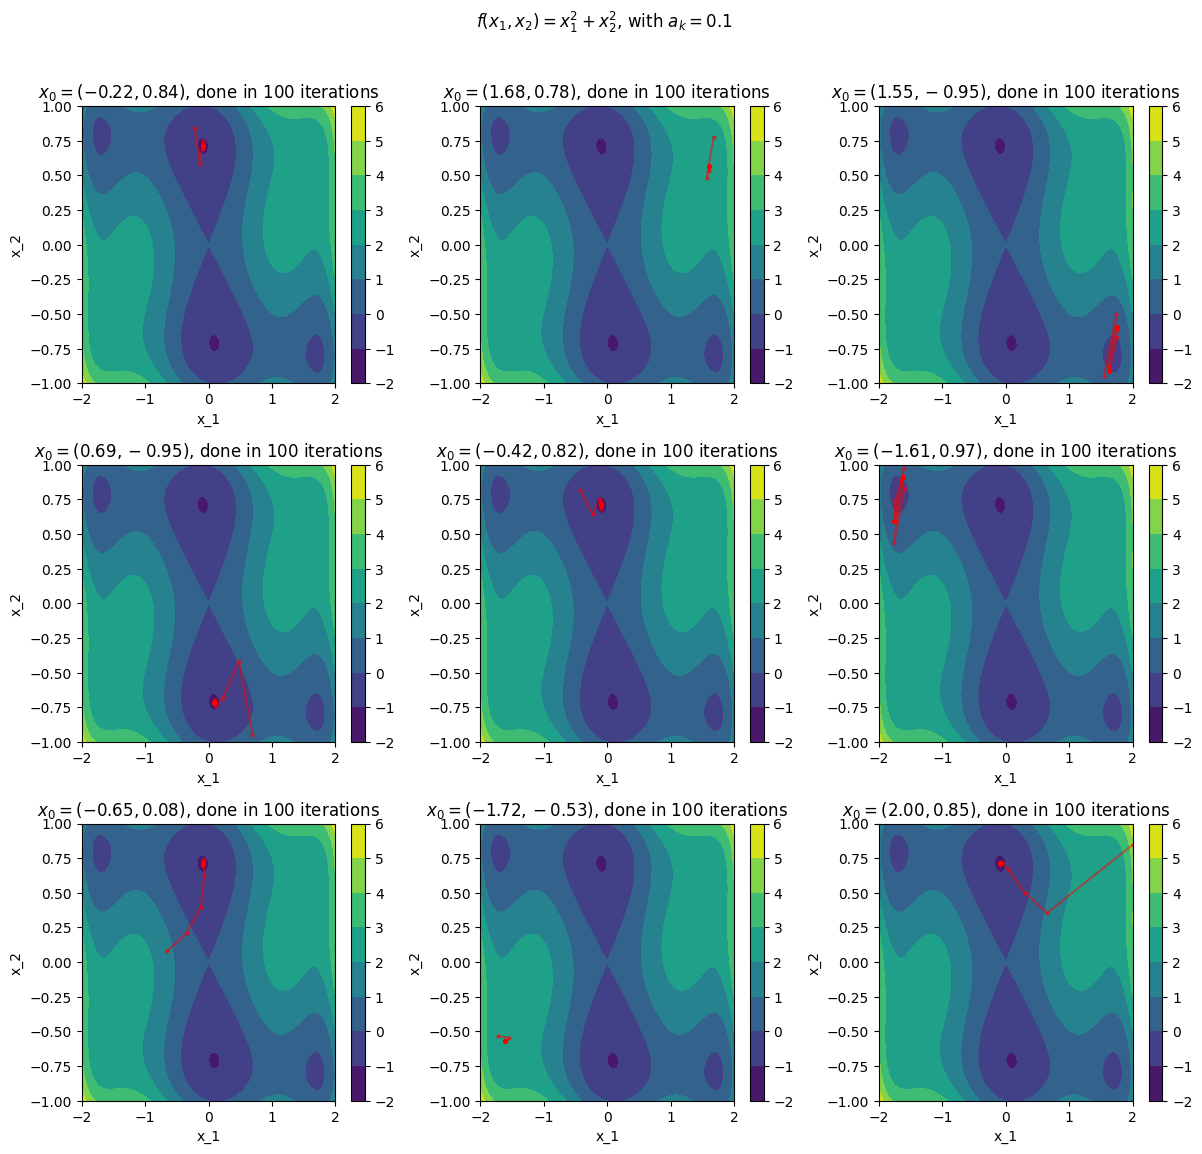

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []

for i in range(9):
  x1 = (0.5-random.random())*4.0
  x2 = (0.5-random.random())*2.0
  x_star, path = gradient_descent([x1, x2], grad_f2,dpath=True)
  k = path.shape[0]
  title = f"$x_0=({x1:.2f}, {x2:.2f})$, done in {k} iterations"
  countour_plot(fig, ax[i//3, i%3], f_2, title=title, xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=1.0)
  ax[i//3, i%3].plot(path[:,0],path[:,1], marker='.', ms=4, color="red", alpha=0.5)
  paths.append(path)
fig.suptitle("$f(x_1,x_2)=x_1^2+x_2^2$, with $a_k=0.1$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

We can see in the figures above, that the function given has multiple minima points. In this figures we plot in red the trajectories of the gradient descent algorithm, using different values of $\mathbf{x}_0$. In these cases, we can clearly observe one of the limitations of gradient descent. Since the method is only based on the gradient at a given point of the function, this is, it only has "local" information about the function, the method can easily converge to a local minimum instead of a global minimum. With multiple minima, there is no guarantee about which mimimum point will reach, and once a minimum is reached (local or global) the method will not be able to "leave" that minimum and find another one. Additionally, in the above figures, since we are using a fixed $\alpha_k$, the method seems to have difficulty converging at certain points.

**2. We will now implement the backtracking method for finding the best next $a_k$**.

In [ ]:
def gradient_descent_backtrack(x_0, grad_fn, fn, dpath=False):
  if dpath:
    path = []
  x = np.array(x_0)
  lastfn = fn(*x)
  k = 0
  while k > -1:
    if dpath:
      path.append(x)
    a_k = 1.0
    grad = grad_fn(*x)
    temp = x - a_k * grad
    newfn = fn(*temp)

    while newfn >= lastfn:
      a_k = a_k/2
      temp = x - a_k * grad
      newfn = fn(*temp)

    if np.linalg.norm(grad_fn(*temp)) < 10e-5:
      x = temp
      path.append(x)
      break
    k += 1
    lastfn = newfn
    x = temp

  if dpath:
    return x, np.array(path), k
  return x, k


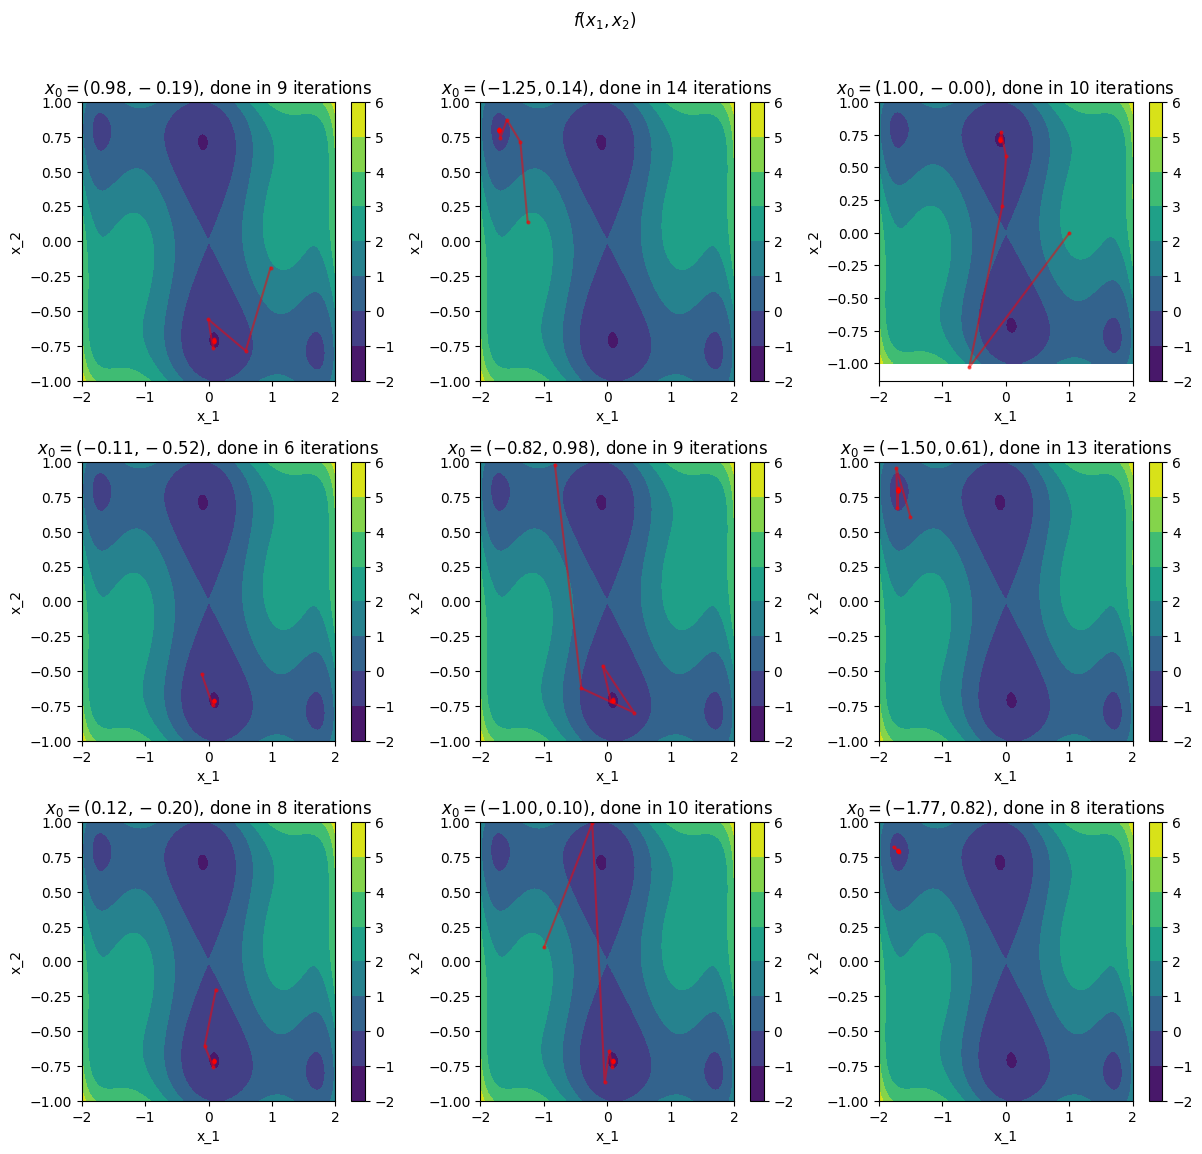

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1 = (0.5-random.random())*4.0
  x2 = (0.5-random.random())*2.0
  x_star, path, k = gradient_descent_backtrack([x1, x2], grad_f2, f_2,dpath=True)
  countour_plot(fig, ax[i//3, i%3], f_2, title=f"$x_0=({x1:.2f}, {x2:.2f})$, done in {k+1} iterations", xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=1.0)
  ax[i//3, i%3].plot(path[:,0],path[:,1], marker='.', ms=4, color="red", alpha=0.5)
  paths.append(path)
fig.suptitle("$f(x_1,x_2)$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In these figures we have plotted the trajectory of the gradient descent method using a variable $\alpha_k$ computed by the backtracking method. From the figures it can be seen that the method is able to converge in a few steps (14 or less iterations). In addition, it can be seen that the method starts with a large step size, and that the step size is increasingly reduced, which makes it easier to the method to reach the minimum. Recall that we decrease $\alpha_k$, when the function does not decrease with the step. Hence, if no decrease of the function is obtained at each step a smaller step is taken. With smaller steps, it is easier for the method to converge towards the minimum which, in this case, leads to a reduced number of steps.

# 1.3 The Rosenbrock function

Given the following function:

$$
f(\mathbf{x_1, x_2}) = (a-x_1)^2+b(x_2-x_1^2)^2
$$

The fuction has a global minimum at $(x_1^*,x_2^*) = (a, a^2)$, where $f(x_1^*, x_2^*)=0$. For the purpose of the next experiments we will consider $a = 1$ and $b = 100$.

**1. We will now plot the Rosenbrock function and the gradient information**.

In [ ]:
def rosenbrock(x1, x2, a=1.0, b=100.0):
  return np.power((a - x1), 2) + (b * np.power((x2 - np.power(x1, 2)),2))

def rosenbrock_grad(x1, x2, a=1.0, b=100.0):
  return np.array([-2*a+2*x1-4*b*x2*x1+4*b*(x1**3), 2*b*x2-2*b*(x1**2)])

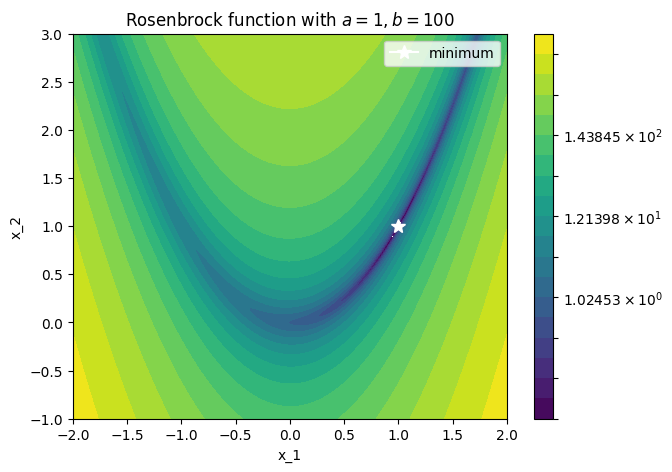

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, ticker

def countour_rosenbrock(fig, ax, function, title="", xmin=-5.0, xmax=5.0, ymin=-5.0, ymax=5.0, steps=100, plot_minimum=False):
  xlist = np.linspace(xmin, xmax, steps)

  ylist = np.linspace(ymin, ymax, steps)
  X, Y = np.meshgrid(xlist, ylist)
  Z = function(X, Y)
  cp = ax.contourf(X, Y, Z, np.logspace(-1.6, 3.5, 20, base=10), locator=ticker.LogLocator())
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title(title)
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')
  if plot_minimum:
    ax.plot(1.0,1.0, marker='*', color="white", markersize=10, label="minimum")
    ax.legend()

plt.rcParams['figure.figsize'] = [7, 5]
fig, ax = plt.subplots(1)

countour_rosenbrock(fig, ax, rosenbrock, title="Rosenbrock function with $a=1, b=100$", xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=3.0, steps=500, plot_minimum=True)

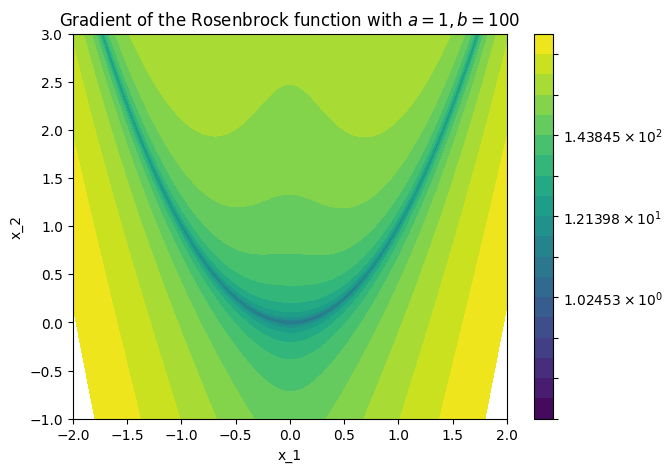

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]
fig, ax = plt.subplots(1)
a=1.0
b=100.0
title = "Gradient of the Rosenbrock function with $a=1, b=100$"
countour_rosenbrock(fig, ax, lambda x1, x2: np.sqrt((-2*a+2*x1-4*b*x2*x1+4*b*(x1**3))**2 + (2*b*x2-2*b*(x1**2))**2), title=title, xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=3.0, steps=500)

In the previous figures we first plotted the Rosenbrock function and then the gradient of the function. It is important to notice that the gradient of the function takes significantly smaller values near the minimum, and larger values when we move away from the "valley" of the function.

**2. We will now try the backtracking mehod on the rosenbrock function and study the different solutions that the function arrives to.**

We now try the previous method on the Rosenbrock function with random initial points, and plot the trajectories below.

----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0001,1.0002) in 7304 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(0.9999,0.9998) in 8744 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0001,1.0002) in 9258 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0001,1.0002) in 7883 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(0.9999,0.9998) in 8626 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(0.9999,0.9998) in 9111 iterations
----------------------------------------------------------------

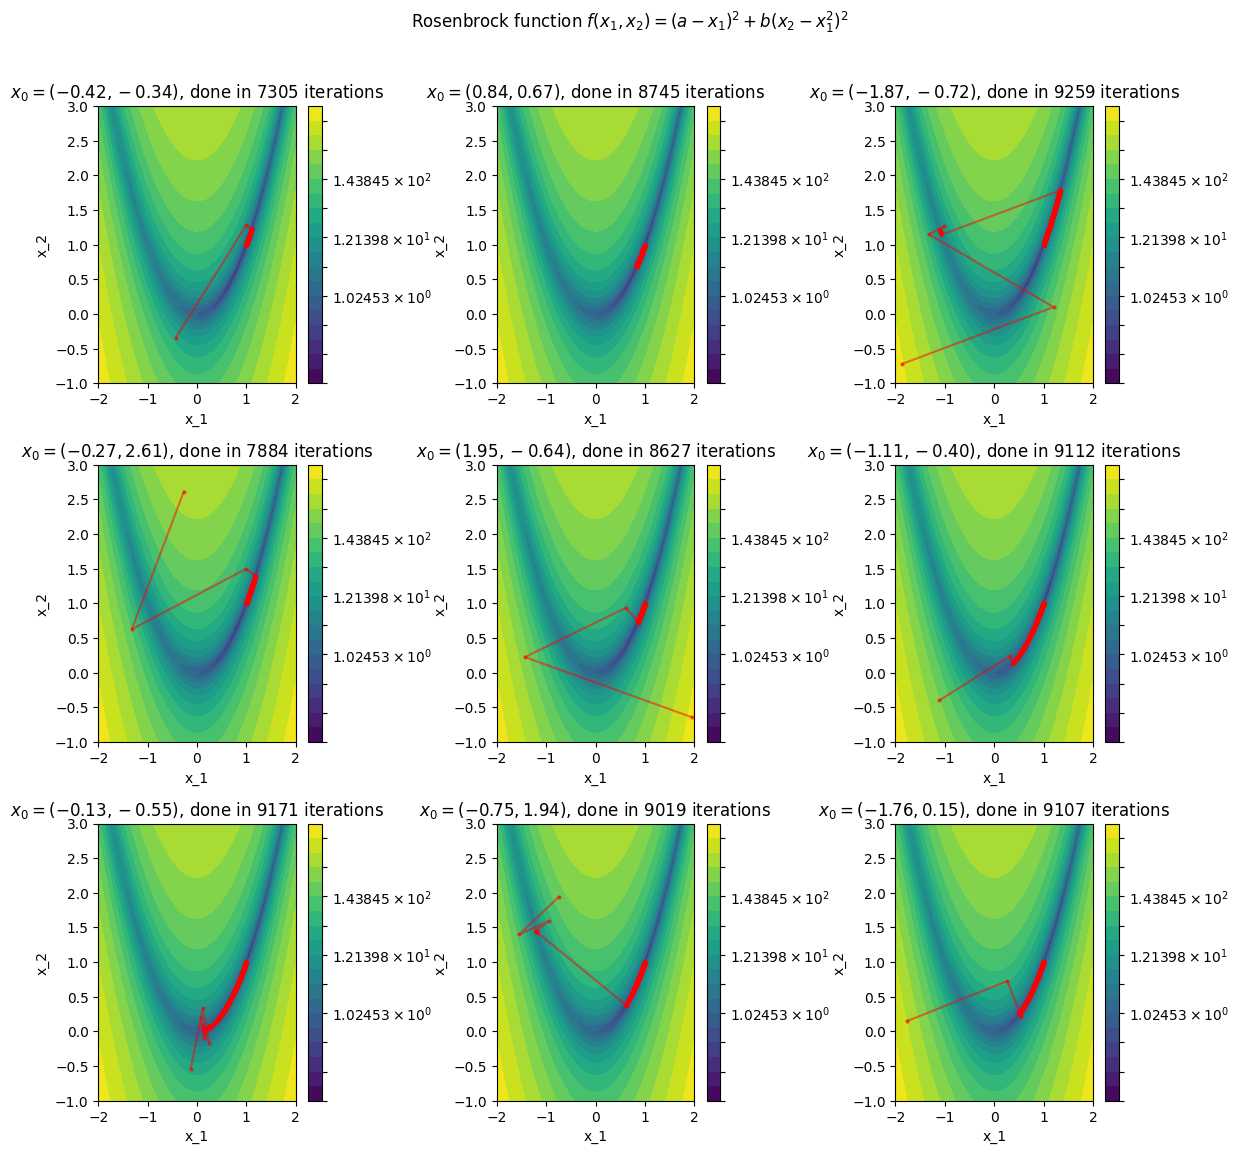

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1 = (0.5-random.random())*4.0
  x2 = (0.75-random.random())*4.0
  print("-"*100)
  x_star, path, k = gradient_descent_backtrack([x1, x2], rosenbrock_grad, rosenbrock,dpath=True)
  print(f"Minimum found at x*=({path[-1,0]:0.4f},{path[-1,1]:0.4f}) in {k} iterations")
  countour_rosenbrock(fig, ax[i//3, i%3], rosenbrock, title=f"$x_0=({x1:.2f}, {x2:.2f})$, done in {k+1} iterations", xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=3.0)
  ax[i//3, i%3].plot(path[:,0],path[:,1], marker='.', ms=4, color="red", alpha=0.5)
  paths.append(path)
fig.suptitle("Rosenbrock function $f(x_1,x_2)=(a-x_1)^2+b(x_2-x_1^2)^2$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

From these trajectories, the first thing one can notice is that the gradient descent takes thousand of steps until convergence (generally more than 5.000 iterations). If one takes a closer look at the trajectories, it is easy to notice that most of the steps are performed at the "valley" of the function. The reason this happens is because gradient descent uses the gradient to compute the next step. If the gradient of the function is small, it will take smaller steps and, as a consequence, it will take longer to converge. We can therefore see with this function, another limitation of gradient descent, and that is, that the magnitude of the gradient will directly affect the size of the steps and consequently, the number of iterations until convergence.

# Newton Descent Method

# 2.1 A simple quadratic function

Given the following function:

$$
f(\mathbf{x}) = 100x_1^2 + x_2^2
$$

with $\mathbf{x} \in \mathbb{R}^2$, $\mathbf{x} = (x_1, x_2)$.

**1. We are first going to minimize the previous function using the gradient descent with backtracking algorithm previously implemented in 1.2**.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def f(x1, x2):
  return (100.0 * (x1**2)) + (x2**2)

def grad_f(x1, x2):
  return np.array([200.0 * x1, 2.0 * x2])

def hessian_f(x1, x2):
  return np.array([[200.0, 0.0], [0.0, 2.0]])

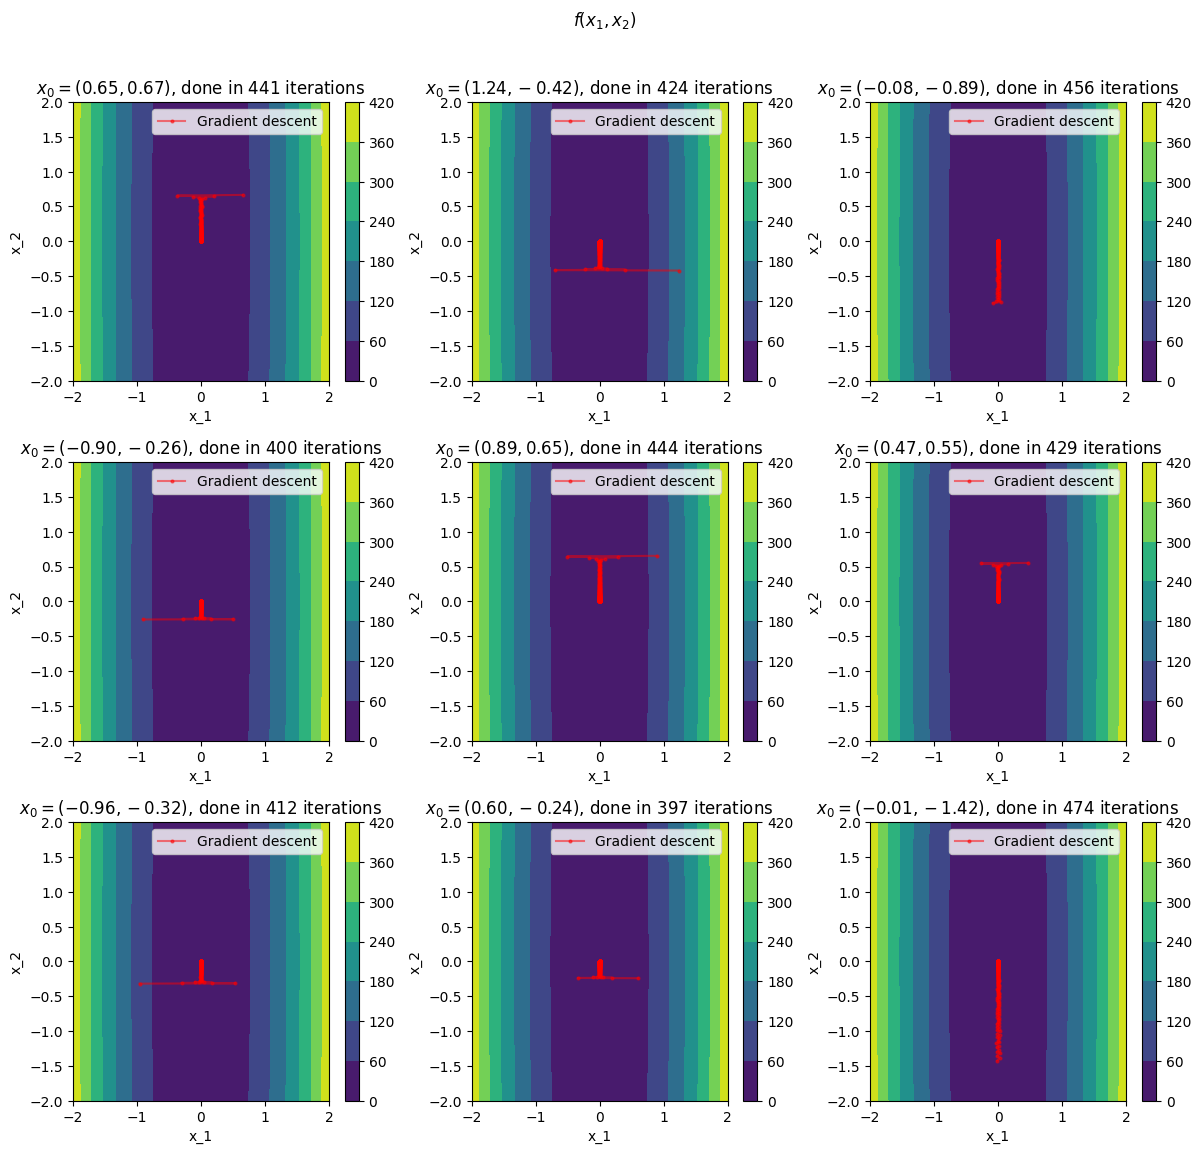

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []

points_f = []
for i in range(9):
  x1 = (0.5-random.random())*3.0
  x2 = (0.5-random.random())*3.0
  points_f.append((x1,x2))
  x_star, path, k = gradient_descent_backtrack([x1, x2], grad_f, f,dpath=True)
  countour_plot(fig, ax[i//3, i%3], f, title=f"$x_0=({x1:.2f}, {x2:.2f})$, done in {k+1} iterations", xmin=-2.0, xmax=2.0, ymin=-2.0, ymax=2.0)
  ax[i//3, i%3].plot(path[:,0],path[:,1], marker='.', ms=4, color="red", alpha=0.5, label="Gradient descent")
  ax[i//3, i%3].legend()
  paths.append(path)
fig.suptitle("$f(x_1,x_2)$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

We can see that we need a lot of iterations to get to the proper minimum of the function, not being very efficient on a very simple function.




---


In a general case, an unconstrained minimization algorithm uses the next algorithm
$$
\textbf{x}_{k+1} = \textbf{x}_{k} - \alpha^k \textbf{d}^k
$$
where $\textbf{d}^k$ is a decescent direction. In this case we'll be using the Newton direction given by performing a quadratic approximation of the fuction from the Taylor expansion of $f(\textbf{x}^k)$.

$$
f(\textbf{x}^k+\textbf{d}) = f(\textbf{x}^k) + \textbf{d}^T + \frac{1}{2}\textbf{d}^T\nabla^2f(\textbf{x}^k)\textbf{d}
$$

So to obtain the direction we solve the linear system of equations given by:

$$
\nabla^2f(\textbf{x}^k)\textbf{d}^k=-\nabla f(\textbf{x}^k)
$$

This system can be simply solved by multiplying the inverse of the hessian by the gradient of the function, thus obtaining the direction $\textbf{d}^k$.

Notice that, compared to the gradient descent, the Newton descent method requires computing analitically the Hessian, which might not be always feasible. In addition, it requires evaluating the Hessian at each iteration and computing the inverse of a matrix (or equivalently, solving a linear system), which, at the end, could potentially hamper the method efficiency. Recall that  gradient descent only required computing and evaluating the gradient of a function.

**2. We are now going to implement the newton descent algorithm defined by the newton direction**.

In [ ]:
def newton_descent_backtrack(x_0, fn, grad_fn, hessian_fn, dpath=False):
  if dpath:
    path = []
  x = np.array(x_0)
  lastfn = fn(*x)
  k = 0
  while k > -1:
    if dpath:
      path.append(x)
    a_k = 1.0
    grad = grad_fn(*x)
    hessian = hessian_fn(*x)
    d_k = -np.dot(np.linalg.inv(hessian), grad)
    temp = x + (a_k * d_k)
    newfn = fn(*temp)

    while newfn >= lastfn:
      a_k = a_k/2
      temp = x + (a_k * d_k)
      newfn = fn(*temp)

    #if a_k < 10e-3 or np.abs(newfn - lastfn) < 10e-3 or np.linalg.norm(grad) < 10e-5:
    if np.linalg.norm(grad_fn(*temp)) < 10e-5:
      x = temp
      path.append(x)
      break
    k += 1
    lastfn = newfn
    x = temp

  if dpath:
    return x, np.array(path), k
  return x, k

**3. Test the newton descent algorithm with the previous points used for standard gradient descent.**

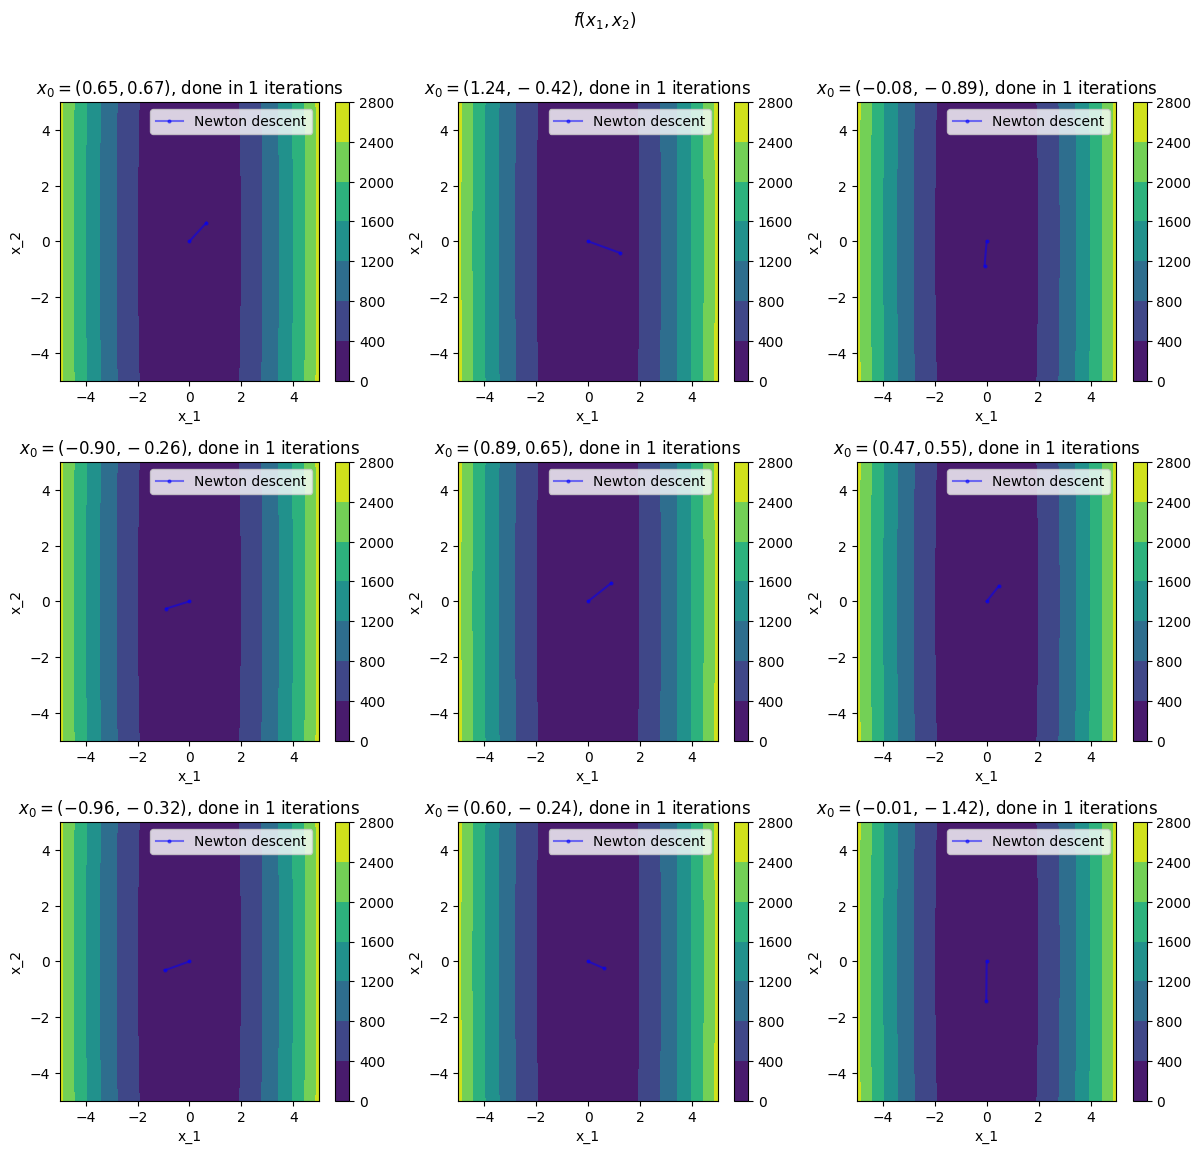

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1, x2 = points_f[i]
  x_star, path, k = newton_descent_backtrack([x1, x2], f, grad_f, hessian_f, dpath=True)
  countour_plot(fig, ax[i//3, i%3], f, title=f"$x_0=({x1:.2f}, {x2:.2f})$, done in {k+1} iterations", xmin=-5.0, xmax=5.0, ymin=-5.0, ymax=5.0)
  ax[i//3, i%3].plot(path[:,0],path[:,1], marker='.', ms=4, color="blue", alpha=0.5, label="Newton descent")
  ax[i//3, i%3].legend()
  paths.append(path)
fig.suptitle("$f(x_1,x_2)$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

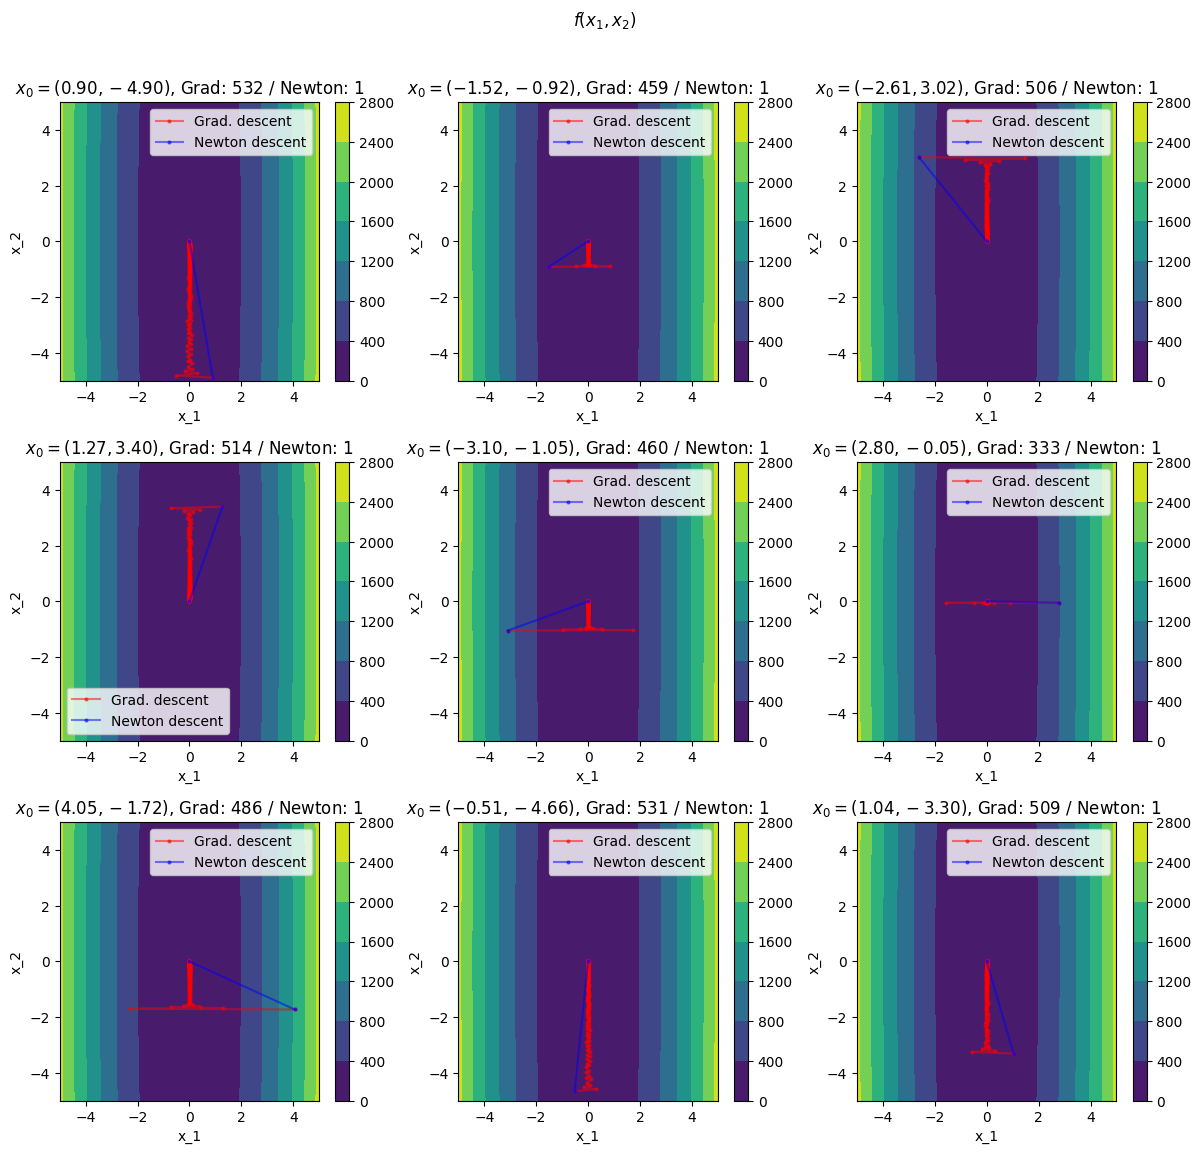

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1 = (0.5-random.random())*10.0
  x2 = (0.5-random.random())*10.0
  grad_x_star, grad_path, grad_k = gradient_descent_backtrack([x1, x2], grad_f, f, dpath=True)
  newt_x_star, newt_path, newt_k = newton_descent_backtrack([x1, x2], f, grad_f, hessian_f, dpath=True)
  title = f"$x_0=({x1:.2f}, {x2:.2f})$, Grad: {grad_k + 1} / Newton: {newt_k + 1}"
  countour_plot(fig, ax[i//3, i%3], f, title=title, xmin=-5.0, xmax=5.0, ymin=-5.0, ymax=5.0)
  ax[i//3, i%3].plot(grad_path[:,0],grad_path[:,1], marker='.', ms=4, color="red", alpha=0.5, label="Grad. descent")
  ax[i//3, i%3].plot(newt_path[:,0],newt_path[:,1], marker='.', ms=4, color="blue", alpha=0.5, label="Newton descent")
  ax[i//3, i%3].legend()
  paths.append(path)
fig.suptitle("$f(x_1,x_2)$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In the above figures we compared the gradient and the method descent on the given function. With the new direction, computed with the Newton method, the iterations are quite different. In all the tests inside the given range of $-5 < x_1 < 5$ and $-5 < x_2 < 5$, the newton descent always finds the minima in one iteration. On the other hand the standard gradient descent has a lot of problems finding the minima of the function, this is in partly due to the standard gradient descent not having any information on how the gradient changes, so it can't adjust the direction when the gradient is small.

# 2.2 A function with multiple minima

Given the following function:

$$
f(\mathbf{x}) = x_1^2(4-2.1x_1^2+\frac{1}{3}x_1^4)+x_1x_2+x_2^2(-4+4x_2^2)
$$

with $\mathbf{x} \in \mathbb{R}^2$, $\mathbf{x} = (x_1, x_2)$.

**1. Recover the experiments performed in the previous sections and compute the number of iterations that are needed to get to the minimum.**

We saved and tested the points from the previous sections and tried getting to the minimum using the newton descent method, but it takes a lot of time because the newton method works really slowly when its not close to the minima. So we decided against trying to compute as it takes too much time. It also may be due to being a point were the hessian is not positive, thus making $\mathbf{d}^k$ not necesarily a descent direction.

In [ ]:
def f(x1, x2):
  return (x1**2)*(4-2.1*x1**2+(1/3)*(x1**4))+x1*x2+(x2**2)*(-4+4*(x2**2))

def grad_f(x1, x2):
  return np.array([8*x1-8.4*(x1**3)+2*(x1**5)+x2, x1-8*x2+16*(x2**3)])

def hessian_f(x1,x2):
  return np.array([[10*(x1**4)-25.2*(x1**2)+8, 1], [1, 48*(x2**2)-8]])

**2. We are now going to implement a combined method that uses the standard direction of the gradient or the newton direction depending on the value of the Hessian**

It is proposed to implement it such that, if the Hessian is positive definite, we perform the descent using the Newton direction, else we use the gradient descent. In both cases we use the backtracking algorithm to compute a good value of $\alpha^k$.


In [ ]:

def combined_newton_gradient_backtrack(x_0, fn, grad_fn, hessian_fn, dpath=False):
  if dpath:
    path = []
  x = np.array(x_0)
  lastfn = fn(*x)
  k = 0
  if dpath:
    path.append((x, 'grad'))
  while k > -1:
    a_k = 1.0
    grad = grad_fn(*x)
    hessian = hessian_fn(*x)

    # we apply newton descend if the Hessian is positive definite
    if np.all(np.linalg.eigvals(hessian) > 0):
      d_k = -np.dot(np.linalg.inv(hessian), grad)
      temp = x + (a_k * d_k)
      newfn = fn(*temp)
      while newfn >= lastfn:
        a_k = a_k/2
        temp = x + (a_k * d_k)
        newfn = fn(*temp)
      lastfn = newfn
      x = temp
      k += 1
      if np.linalg.norm(grad_fn(*x)) < 10e-5:
        path.append((x, 'newton'))
        break
      if dpath:
        path.append((x, 'newton'))

    # else we apply classic gradient descent
    else:
      temp = x - (a_k * grad)
      newfn = fn(*temp)
      while newfn >= lastfn:
        a_k = a_k/2
        temp = x - (a_k * grad)
        newfn = fn(*temp)
      lastfn = newfn
      x = temp
      k += 1
      if np.linalg.norm(grad_fn(*x)) < 10e-5:
        path.append((x, 'grad'))
        break
      if dpath:
        path.append((x, 'grad'))
  if dpath:
    return x, path, k
  return x, k

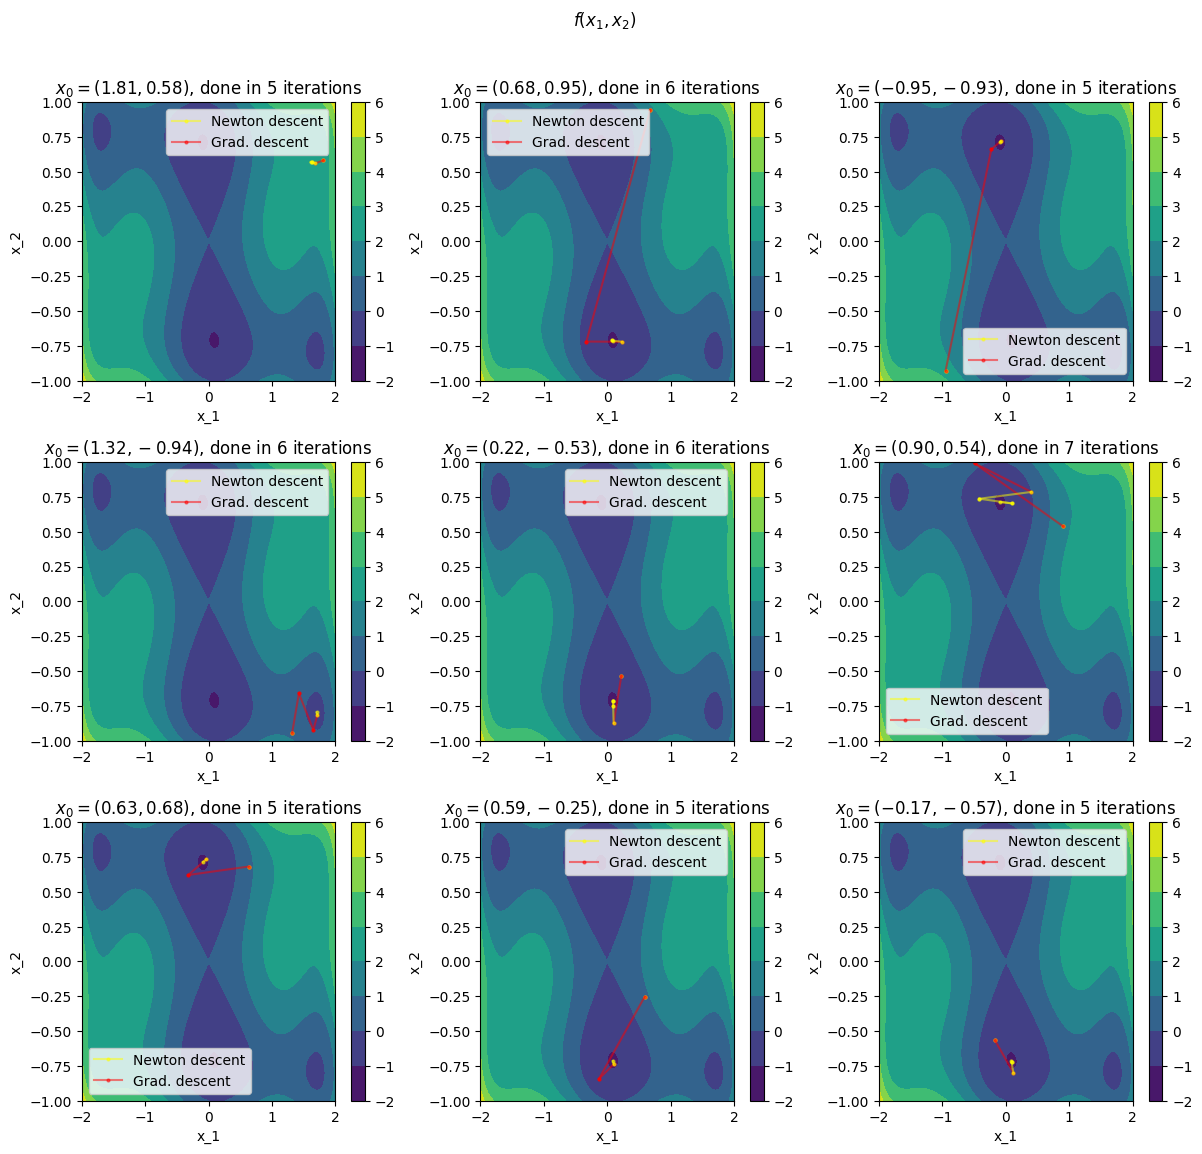

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1 = (0.5-random.random())*4.0
  x2 = (0.5-random.random())*2.0
  x_star, path, k = combined_newton_gradient_backtrack([x1, x2], f, grad_f, hessian_f, dpath=True)
  countour_plot(fig, ax[i//3, i%3], f, title=f"$x_0=({x1:.2f}, {x2:.2f})$, done in {k+1} iterations", xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=1.0)
  prev = path[0][0][0], path[0][0][1]
  already_plotted = set() # this is to avoid plotting the legend multiple times
  for j in range(len(path[1:])):
    x, _ = path[j]
    _, algo = path[j - 1]
    color = 'red' if algo == 'grad' else 'yellow'
    label = "Grad. descent" if algo == 'grad' else 'Newton descent'
    label = None if label in already_plotted else label
    already_plotted.add(label)
    ax[i//3, i%3].plot([prev[0], x[0]], [prev[1], x[1]], marker='.', ms=4, color=color, alpha=0.5, label=label)
    prev = x[0], x[1]
  ax[i//3, i%3].legend()
  paths.append(path)
fig.suptitle("$f(x_1,x_2)$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

We can see that when we are close to the minimum the Newton descent is used, since it can find the minima more easily than the gradient descent when it is close to one. The change from gradient descent to Newton descent occurs when the function is convex (Hessian is positive definite), which, in this function, happens near the minima.

**3. Compare the different methods performance in the given function.**

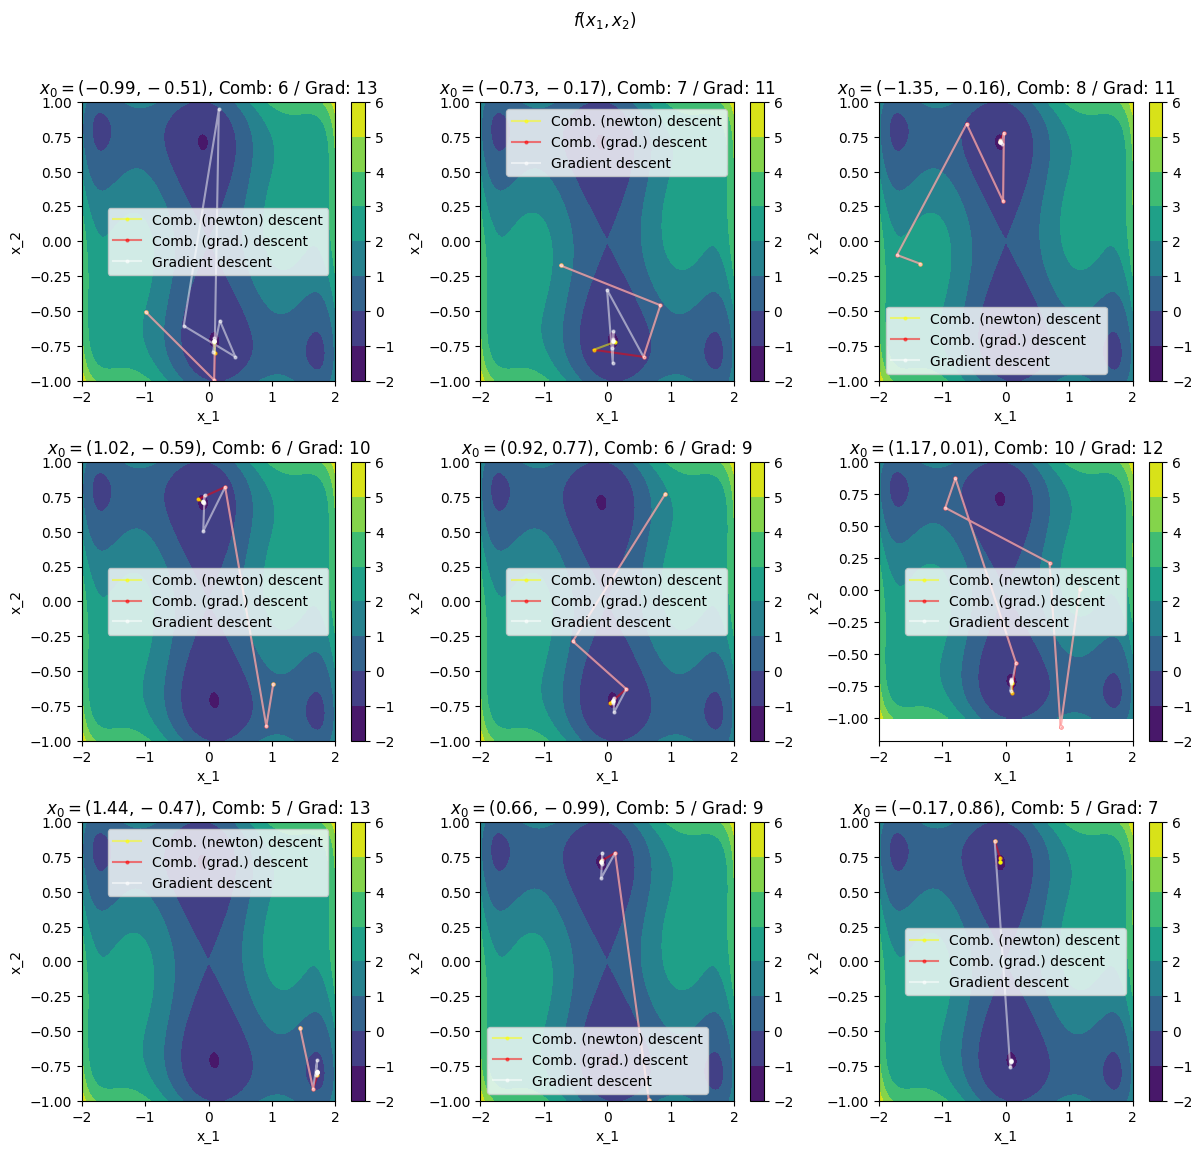

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1 = (0.5-random.random())*4.0
  x2 = (0.5-random.random())*2.0
  grad_x_star, grad_path, grad_k = gradient_descent_backtrack([x1, x2], grad_f, f, dpath=True)
  comb_x_star, comb_path, comb_k = combined_newton_gradient_backtrack([x1, x2], f, grad_f, hessian_f, dpath=True)
  title = f"$x_0=({x1:.2f}, {x2:.2f})$, Comb: {comb_k + 1} / Grad: {grad_k + 1}"
  countour_plot(fig, ax[i//3, i%3], f, title=title, xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=1.0)
  prev = comb_path[0][0][0], comb_path[0][0][1]
  already_plotted = set() # this is to avoid plotting the legend multiple times
  for j in range(len(comb_path[1:])):
    x, _ = comb_path[j]
    _, algo = comb_path[j-1]
    color = 'red' if algo == 'grad' else 'yellow'
    label = "Comb. (grad.) descent" if algo == 'grad' else 'Comb. (newton) descent'
    label = None if label in already_plotted else label
    already_plotted.add(label)
    ax[i//3, i%3].plot([prev[0], x[0]], [prev[1], x[1]], marker='.', ms=4, color=color, alpha=0.5, label=label)
    prev = x[0], x[1]
  ax[i//3, i%3].plot(grad_path[:,0],grad_path[:,1], marker='.', ms=4, color="white", alpha=0.5, label="Gradient descent")
  ax[i//3, i%3].legend()
  paths.append(path)
fig.suptitle("$f(x_1,x_2)$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

We decided to only plot the combined method and the gradient descent due to the same reasons as before: the Newton descent is not guaranteed converge if the Hessian is not positive definite.

We can see that the combined method converges faster to the minimum than just the gradient descent. This is due to the Newton descent taking over when the points are near the minimum.

# 2.3 The Rosenbrock function

Given the following function:

$$
f(\mathbf{x}) = (1-x_1)^2+100(x_2-x_1^2)^2
$$

with $\mathbf{x} \in \mathbb{R}^2$, $\mathbf{x} = (x_1, x_2)$.


In [ ]:
def rosenbrock(x1, x2, a=1.0, b=100.0):
  return np.power((a - x1), 2) + (b * np.power((x2 - np.power(x1, 2)),2))

def rosenbrock_grad(x1, x2, a=1.0, b=100.0):
  return np.array([(-2.*a) + (2.*x1) - (4*b*x2*x1) + (4*b*(x1**3)), (2*b*x2) - (2*b*(x1**2))])

def rosenbrock_hessian(x1, x2, a=1.0, b=100.0):
  return np.array([
      [2. - (4.*b*x2) + (12.*b*(x1**2)),   -4.*b*x1],
      [-4.*b*x1,                               2.*b]
  ])

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, ticker

def countour_rosenbrock(fig, ax, function, title="", xmin=-5.0, xmax=5.0, ymin=-5.0, ymax=5.0, steps=100):
  xlist = np.linspace(xmin, xmax, steps)

  ylist = np.linspace(ymin, ymax, steps)
  X, Y = np.meshgrid(xlist, ylist)
  Z = function(X, Y)
  cp = ax.contourf(X, Y, Z, np.logspace(-1.6, 3.5, 20, base=10), locator=ticker.LogLocator())
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title(title)
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')

----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0000,1.0000) in 10 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0000,1.0000) in 7 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0000,1.0000) in 21 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0000,1.0000) in 23 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0000,1.0000) in 16 iterations
----------------------------------------------------------------------------------------------------
Minimum found at x*=(1.0000,1.0000) in 22 iterations
-----------------------------------------------------------------------------

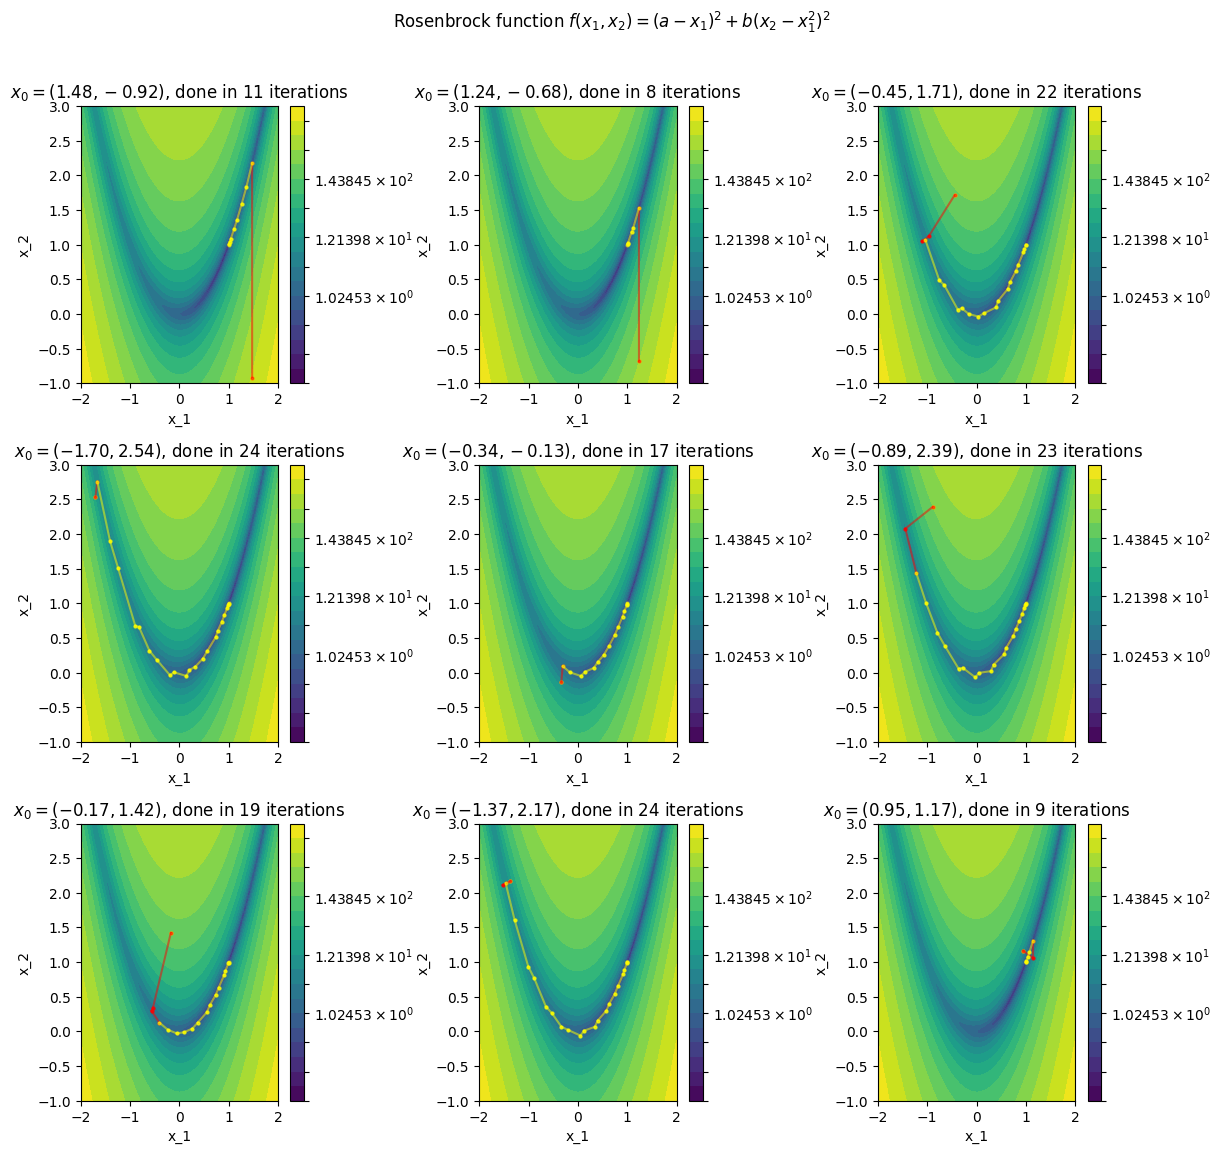

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12] # resize notebook plots
fig, ax = plt.subplots(3,3)
paths = []
for i in range(9):
  x1 = (0.5-random.random())*4.0
  x2 = (0.75-random.random())*4.0
  print("-"*100)
  comb_x_star, comb_path, comb_k = combined_newton_gradient_backtrack(
      [x1, x2],
      rosenbrock,
      rosenbrock_grad,
      rosenbrock_hessian,
      dpath=True)
  print(f"Minimum found at x*=({comb_x_star[0]:0.4f},{comb_x_star[1]:0.4f}) in {comb_k} iterations")


  title = f"$x_0=({x1:.2f}, {x2:.2f})$, done in {comb_k+1} iterations"
  countour_rosenbrock(fig, ax[i//3, i%3], rosenbrock, title=title, xmin=-2.0, xmax=2.0, ymin=-1.0, ymax=3.0)

  prev = comb_path[0][0][0], comb_path[0][0][1]
  for j in range(len(comb_path[1:])):
    x, _ = comb_path[j]
    _, algo = comb_path[j-1]
    color = 'red' if algo == 'grad' else 'yellow'
    ax[i//3, i%3].plot([prev[0], x[0]], [prev[1], x[1]], marker='.', ms=4, color=color, alpha=0.5)
    prev = x[0], x[1]

  paths.append(path)

fig.suptitle("Rosenbrock function $f(x_1,x_2)=(a-x_1)^2+b(x_2-x_1^2)^2$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95],pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

Here we tried the combined method and see that the gradient descent is at most used once or twice per experiment at the beginning to land in the bottom of the valley, then the Newton descent takes over as the Hessian is positive definite. The Newton converges fast to the minima once it is at the bottom of the valley.

Comparing the iterations with the experiments performed in 1.3 we can see that its a great improvement, from 5000+ iteration with just gradient descent to less than 25 iterations to get to the minima. As it has been discussed, since the step size in the Newton method is normalized with the Hessian, it is possible to avoid the problem that existed with gradient descent, that is, very small steps are taken when the gradient is small.